In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py 

In [2]:
with h5py.File('results_TD.hdf5', 'r') as f:
    
    exp_data = f['exp_data'][:]
    gammas_data = f['gammas_data'][:]
    gammas_names = f['gammas_names'][:].astype(str)
    exp_names = f['exp_names'][:].astype(str)
    recProbExp = f['recProbExp'][:]

In [3]:
print(exp_names)

['Tnw' 'Tw' 'O_den' 'pressure' 'current' 'FluxIon' 'EavgMB']


In [4]:
Tnw_vec = exp_data[:, 0]
Tw_vec = exp_data[:, 1]
pressure_vec = exp_data[:, 3]
current_vec = exp_data[:, 4]
gammas_total_vec = np.sum(gammas_data, axis=1)
gammas_exp_vec = recProbExp


In [5]:
print(gammas_total_vec)
print(gammas_exp_vec)

[0.00129035 0.00139522 0.00143129 0.00217938 0.00255877 0.00267279
 0.00175871 0.00169921 0.00163072 0.00207138 0.00260484 0.00300917
 0.00342137 0.00363405 0.00337722 0.00047225 0.00035161 0.00027647
 0.00029216 0.00033193 0.00036085 0.00038004 0.0003736  0.00070017
 0.00044374 0.00030467 0.00031726 0.00036133 0.00039722 0.00044034
 0.00047874 0.00043524 0.00063024 0.00052321 0.00046823 0.00052497
 0.00064612 0.00073764 0.0008344  0.00080498 0.00093035 0.00065639
 0.00053468 0.00061097 0.00074899 0.0008618  0.00098294 0.0010519
 0.00101014 0.00041699 0.00031772 0.00025359 0.00025642 0.00027374
 0.00028896 0.00030455 0.00031622 0.00058757 0.00038636 0.00026973
 0.00027389 0.00029465 0.00031386 0.00033961 0.00037573 0.00039326]
[0.00055986 0.000674   0.00072589 0.00085003 0.00083175 0.00085335
 0.00083872 0.00089811 0.00095073 0.00102494 0.00115387 0.00129704
 0.00148245 0.0017851  0.00210425 0.00065993 0.0005501  0.00055744
 0.00057657 0.00065606 0.00069927 0.00072994 0.00068744 0.0013

In [6]:
pressure_values = np.unique(pressure_vec)
print(pressure_values)

[0.4 0.6 0.8 1.  1.5 2.  3.  5.  7.5]


In [ ]:
Tw_unique_values = np.unique(Tw_vec)
current_unique_values = np.unique(current_vec)

##### all pssible combinations of Tw and current
Tw_current_combinations = np.array(np.meshgrid(Tw_unique_values, current_unique_values)).T.reshape(-1, 2)

for pair in Tw_current_combinations:
    Tw = pair[0]
    current = pair[1]
    indices = np.where((Tw_vec == Tw) & (current_vec == current))[0]
    gammas_total = gammas_total_vec[indices]
    gammas_exp = gammas_exp_vec[indices]
    pressure = pressure_vec[indices]
    plt.figure()
    plt.plot(pressure, gammas_total*1e4, 'o', label='Total')
    plt.plot(pressure, gammas_exp*1e4, 'x', label='Exp')
    plt.grid()
    plt.xlabel('Pressure (Torr)')
    plt.ylabel('Rec. prob. (1e-4)')
    plt.title('Tw = %d K, I = %d mA' % (Tw, current))
    plt.legend()
    plt.show()

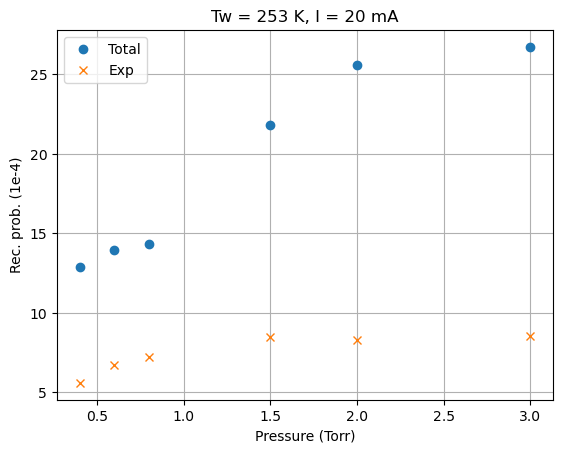

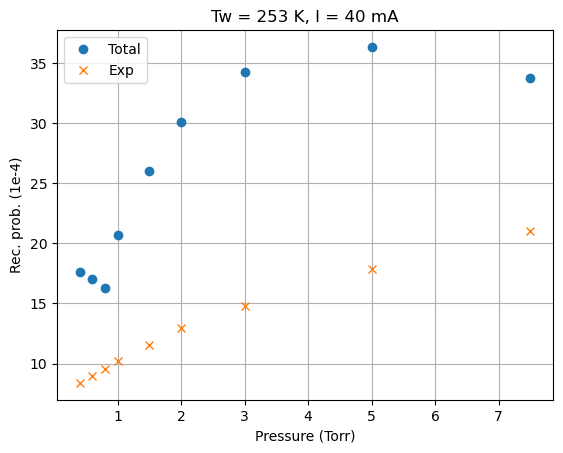

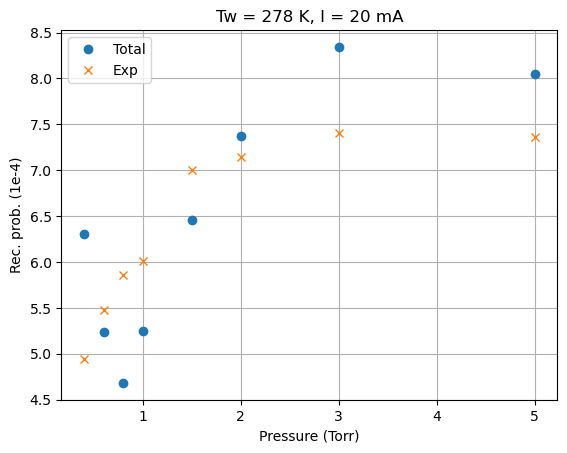

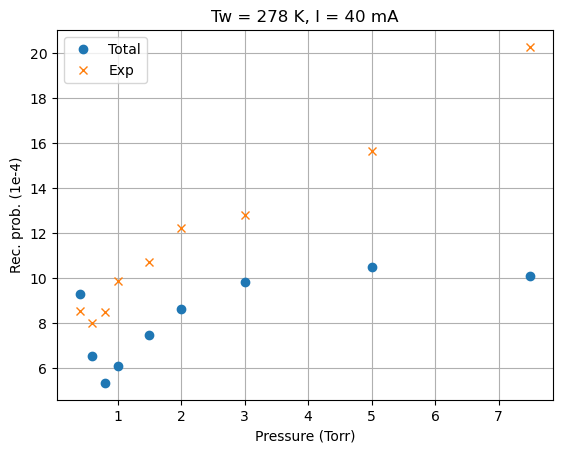

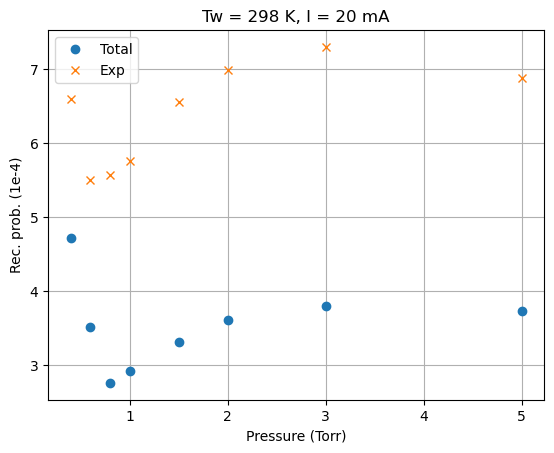

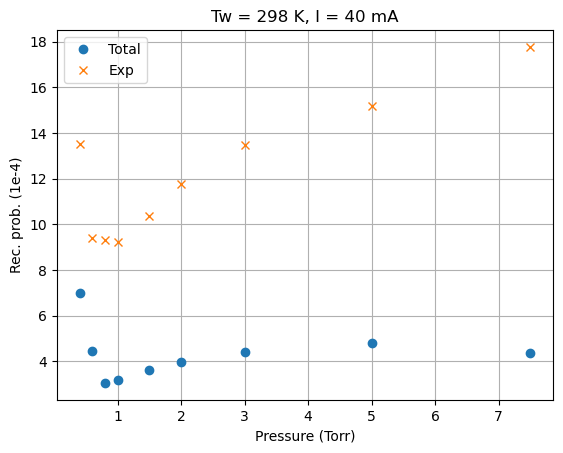

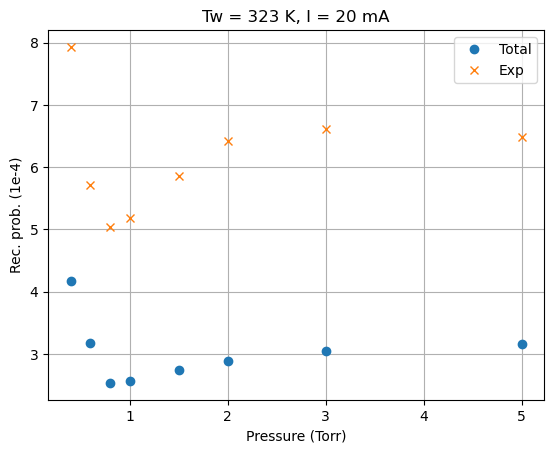

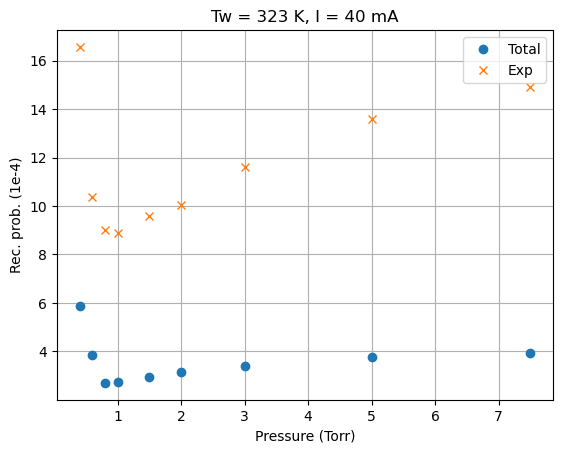

In [7]:
Tw_unique_values = np.unique(Tw_vec)
current_unique_values = np.unique(current_vec)

##### all pssible combinations of Tw and current
Tw_current_combinations = np.array(np.meshgrid(Tw_unique_values, current_unique_values)).T.reshape(-1, 2)

for pair in Tw_current_combinations:
    Tw = pair[0]
    current = pair[1]
    indices = np.where((Tw_vec == Tw) & (current_vec == current))[0]
    gammas_total = gammas_total_vec[indices]
    gammas_exp = gammas_exp_vec[indices]
    pressure = pressure_vec[indices]
    plt.figure()
    plt.plot(pressure, gammas_total*1e4, 'o', label='Total')
    plt.plot(pressure, gammas_exp*1e4, 'x', label='Exp')
    plt.grid()
    plt.xlabel('Pressure (Torr)')
    plt.ylabel('Rec. prob. (1e-4)')
    plt.title('Tw = %d K, I = %d mA' % (Tw, current))
    plt.legend()
    plt.show()

#### 